<a href="https://colab.research.google.com/github/Gorli-Jahanavi/classify_diabeties_dataset/blob/main/diabetiesdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 Accuracy: 0.75

📄 Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79        75
         1.0       0.75      0.66      0.70        58

    accuracy                           0.75       133
   macro avg       0.75      0.74      0.74       133
weighted avg       0.75      0.75      0.75       133



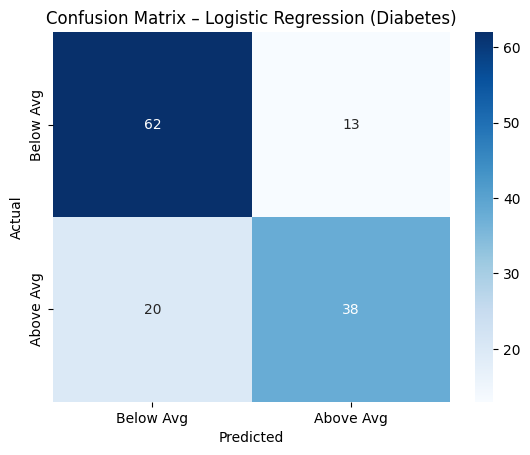

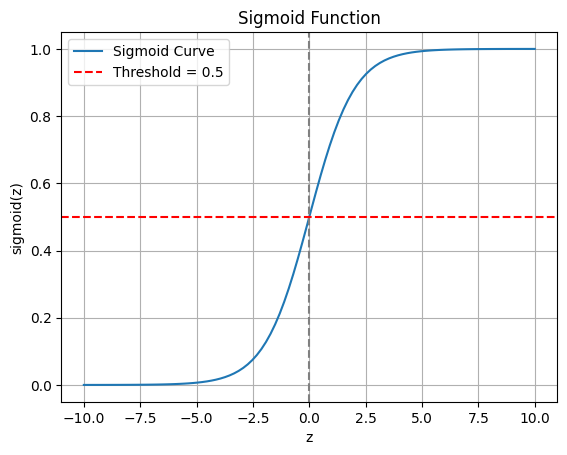

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y_continuous = diabetes.target

# Step 2: Convert to binary classification
# We will classify whether the target value is above average (1) or below average (0)
threshold = y_continuous.mean()
y = Binarizer(threshold=threshold).fit_transform(y_continuous.reshape(-1, 1)).ravel()

# Step 3: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 5: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Accuracy: {accuracy:.2f}")
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Below Avg', 'Above Avg'], yticklabels=['Below Avg', 'Above Avg'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression (Diabetes)")
plt.show()

# Step 8: Show sigmoid function (optional visual)
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

plt.plot(z, sig, label="Sigmoid Curve")
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.legend()
plt.grid()
plt.show()
